In [61]:
import uproot
import ROOT
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%jsroot on

In [2]:
file = uproot.open('vertexperformance_AMVF.root')

In [3]:
file.keys()

['Truth_Vertex;7',
 'Truth_Vertex;6',
 'Reco_Vertex;4',
 'Reco_Vertex;3',
 'amvf;1']

In [4]:
Truth_Info = file['Truth_Vertex;7']
Reco_Info = file['Reco_Vertex;4']

In [29]:
Truth_Info.keys()

['event_id',
 'ntruthVtx_total',
 'ntruthVtx_reconstructable',
 'truth_vtx_vx',
 'truth_vtx_vy',
 'truth_vtx_vz',
 'truth_particle_Id',
 'truth_particle_Type',
 'truth_particle_process',
 'truth_particle_vx',
 'truth_particle_vy',
 'truth_particle_vz',
 'truth_particle_vt',
 'truth_particle_p',
 'truth_particle_px',
 'truth_particle_py',
 'truth_particle_pz',
 'truth_particle_m',
 'truth_particle_q',
 'truth_particle_eta',
 'truth_particle_phi',
 'truth_particle_pt',
 'truth_particle_vertexPrimary',
 'truth_particle_vertexSecondary',
 'truth_particle_particle',
 'truth_particle_generation',
 'truth_particle_subParticle',
 'truth_vtx_fitted_trk_d0',
 'truth_vtx_fitted_trk_z0',
 'truth_vtx_fitted_trk_phi',
 'truth_vtx_fitted_trk_theta',
 'truth_vtx_fitted_trk_qp',
 'truth_vtx_fitted_trk_time',
 'truth_vtx_fitted_trk_err_d0',
 'truth_vtx_fitted_trk_err_z0',
 'truth_vtx_fitted_trk_err_phi',
 'truth_vtx_fitted_trk_err_theta',
 'truth_vtx_fitted_trk_err_qp',
 'truth_vtx_fitted_trk_err_time',

In [111]:
Reco_Info.keys()

['event_id',
 'reco_vtx_vx',
 'reco_vtx_vy',
 'reco_vtx_vz',
 'reco_vtx_fitquality_chiSquared',
 'reco_vtx_fitquality_nDoF',
 'reco_vtx_err_vx_vx',
 'reco_vtx_err_vx_vy',
 'reco_vtx_err_vx_vz',
 'reco_vtx_err_vy_vy',
 'reco_vtx_err_vy_vz',
 'reco_vtx_err_vz_vz',
 'reco_vtx_fitted_trk_d0',
 'reco_vtx_fitted_trk_z0',
 'reco_vtx_fitted_trk_phi',
 'reco_vtx_fitted_trk_theta',
 'reco_vtx_fitted_trk_qp',
 'reco_vtx_fitted_trk_time',
 'reco_vtx_fitted_trk_err_d0',
 'reco_vtx_fitted_trk_err_z0',
 'reco_vtx_fitted_trk_err_phi',
 'reco_vtx_fitted_trk_err_theta',
 'reco_vtx_fitted_trk_err_qp',
 'reco_vtx_fitted_trk_err_time',
 'reco_vtx_fitted_trk_chi2Track',
 'reco_vtx_fitted_trk_ndf',
 'reco_vtx_fitted_trk_vertexCompatibility',
 'reco_vtx_fitted_trk_trackWeight',
 'reco_vtx_fitted_trk_vtxID']

In [9]:
truth_vtx_vz = Truth_Info['truth_vtx_vz'].array()
reco_vtx_vz = Reco_Info['reco_vtx_vz'].array()

In [18]:
truth_vtx_dist = ROOT.TH1F("truth_vtx_dist", "# of reconstrutable truth vtx distribution",30,0,30)
reco_vtx_dist = ROOT.TH1F("reco_vtx_dist", "# of reco'ed vtx distribution",30,0,30)
truth_vtx_vs_reco_vtx = ROOT.TH2D("reco_truth_vtx_vs_reco_vtx", "reconstrutable truth_vtx vs reco_vtx", 30,0,30, 30,0,30)

hist_truth_vtx_vz = ROOT.TH1F("hist_truth_vtx_vz", "Truth vtx vz distribution", 800, -200.0, 200.0)
hist_reco_vtx_vz = ROOT.TH1F("hist_reco_vtx_vz", "Reco vtx vz distribution", 800, -200.0, 200.0)


for i in range(len(truth_vtx_vz)):
    truth_vtx_dist.Fill(len(truth_vtx_vz[i]))
    reco_vtx_dist.Fill(len(reco_vtx_vz[i]))
    truth_vtx_vs_reco_vtx.Fill(len(truth_vtx_vz[i]), len(reco_vtx_vz[i]))
    
    for _, vtx_vz in enumerate(truth_vtx_vz[i]):
        hist_truth_vtx_vz.Fill(vtx_vz)
        
    for _, vtx_vz in enumerate(reco_vtx_vz[i]):
        hist_reco_vtx_vz.Fill(vtx_vz)
        


Warning in <TROOT::Append>: Replacing existing TH1: truth_vtx_dist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: reco_vtx_dist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: reco_truth_vtx_vs_reco_vtx (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_truth_vtx_vz (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hist_reco_vtx_vz (Potential memory leak).


In [19]:
canvas_truth_vtx_dist = ROOT.TCanvas()
# reco_truth_vtx_dist.Fit("gaus", "S")
truth_vtx_dist.Draw()
canvas_truth_vtx_dist.Draw()

In [20]:
canvas_reco_vtx_dist = ROOT.TCanvas()
reco_vtx_dist.Draw()
canvas_reco_vtx_dist.Draw()

In [25]:
canvas_truth_vtx_vs_reco_vtx_TH2D = ROOT.TCanvas()
# reco_truth_vtx_vs_reco_vtx.ProfileX().Draw()
truth_vtx_vs_reco_vtx.Draw()
canvas_truth_vtx_vs_reco_vtx_TH2D.Draw()

In [28]:
canvas_truth_vtx_vs_reco_vtx_TProfile = ROOT.TCanvas()
reco_truth_vtx_vs_reco_vtx.ProfileX().Draw()
# reco_truth_vtx_vs_reco_vtx.Draw()
canvas_truth_vtx_vs_reco_vtx_TProfile.Draw()

In [27]:
canvas_hist_truth_vtx_vz = ROOT.TCanvas()
hist_truth_vtx_vz.Fit("gaus")
hist_truth_vtx_vz.Draw()
canvas_hist_truth_vtx_vz.Draw()

 FCN=712.543 FROM MIGRAD    STATUS=CONVERGED      56 CALLS          57 TOTAL
                     EDM=5.94611e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.60133e+02   1.19416e+00   1.26685e-02  -5.07167e-05
   2  Mean         2.22660e-01   2.06613e-01   2.69455e-03   1.92200e-04
   3  Sigma        5.50519e+01   1.48502e-01   9.49305e-06   5.93495e-02


In [26]:
canvas_hist_reco_vtx_vz = ROOT.TCanvas()
hist_reco_vtx_vz.Fit("gaus")
hist_reco_vtx_vz.Draw()
canvas_hist_reco_vtx_vz.Draw()


 FCN=682.012 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=1.87341e-09    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.52727e+02   1.17389e+00   1.21861e-02  -2.67532e-05
   2  Mean        -2.24598e-01   2.10257e-01   2.68297e-03   8.85725e-05
   3  Sigma        5.53354e+01   1.51130e-01   9.41534e-06   3.75434e-02


In [31]:
truth_vtx_fitted_trk_d0 = Truth_Info['truth_vtx_fitted_trk_d0'].array()
truth_vtx_fitted_trk_z0 = Truth_Info['truth_vtx_fitted_trk_z0'].array()
truth_vtx_fitted_trk_vtxID = Truth_Info['truth_vtx_fitted_trk_vtxID'].array()

14


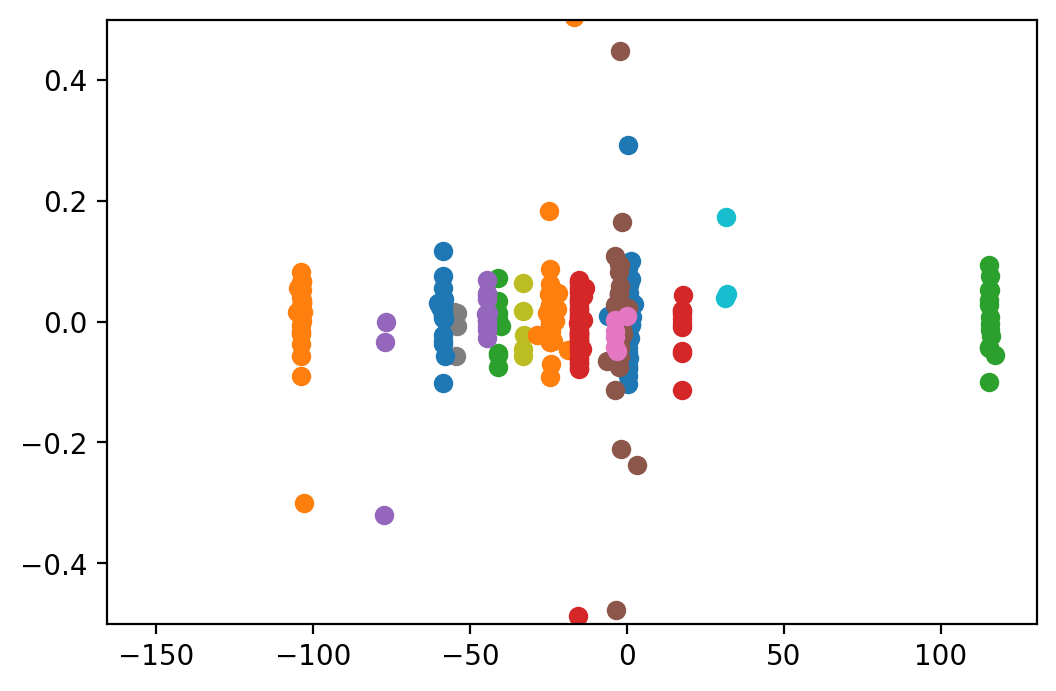

In [118]:
N = 390
truth_vtx_fitted_trk_vtxID_arr = np.array(truth_vtx_fitted_trk_vtxID[N])
n_vtx = np.max(truth_vtx_fitted_trk_vtxID_arr)
plt.figure(1, dpi=200)
print(n_vtx)
for i in range(n_vtx+1):
    label = np.where(truth_vtx_fitted_trk_vtxID_arr==i)
    plt.scatter(truth_vtx_fitted_trk_z0[N][label], truth_vtx_fitted_trk_d0[N][label])
    
plt.ylim(-0.5, 0.5);
plt.savefig('truth_track_scaled.png')


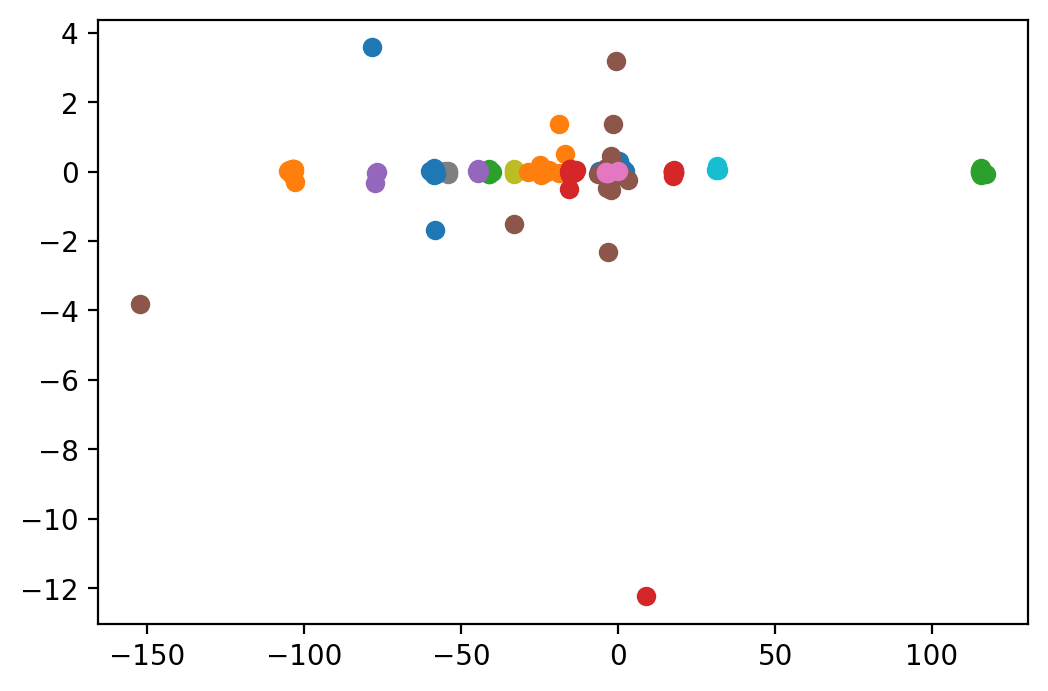

In [117]:
truth_vtx_fitted_trk_vtxID_arr = np.array(truth_vtx_fitted_trk_vtxID[N])

plt.figure(2, dpi=200)

for i in range(np.max(truth_vtx_fitted_trk_vtxID_arr)+1):
    label = np.where(truth_vtx_fitted_trk_vtxID_arr==i)
    plt.scatter(truth_vtx_fitted_trk_z0[N][label], truth_vtx_fitted_trk_d0[N][label])
    
plt.savefig('truth_track.png')

In [103]:
for i, label in enumerate(truth_vtx_fitted_trk_vtxID[N]):
    print(f"{i}-track, d0 = {truth_vtx_fitted_trk_d0[N][i]:.5f}, z0 = {truth_vtx_fitted_trk_z0[N][i]:.5f}, label = {label}")

0-track, d0 = 0.00835, z0 = 35.81349, label = 0
1-track, d0 = 0.01313, z0 = 35.47936, label = 0
2-track, d0 = 0.03052, z0 = 35.35355, label = 0
3-track, d0 = 0.04529, z0 = 35.29491, label = 0
4-track, d0 = -0.04073, z0 = 35.41787, label = 0
5-track, d0 = -0.02043, z0 = 35.35957, label = 0
6-track, d0 = -0.02424, z0 = 35.29273, label = 0
7-track, d0 = 0.01230, z0 = 35.40680, label = 0
8-track, d0 = -0.08134, z0 = 35.40919, label = 0
9-track, d0 = 0.02236, z0 = 35.39808, label = 0
10-track, d0 = 0.01437, z0 = 35.37693, label = 0
11-track, d0 = -0.02787, z0 = 35.29982, label = 0
12-track, d0 = -0.00901, z0 = 35.27182, label = 0
13-track, d0 = 0.04137, z0 = 35.70406, label = 0
14-track, d0 = -0.07077, z0 = 35.38888, label = 0
15-track, d0 = -0.03995, z0 = 35.36293, label = 0
16-track, d0 = -0.02564, z0 = 35.41089, label = 0
17-track, d0 = 0.03615, z0 = 35.38416, label = 0
18-track, d0 = -0.01321, z0 = 35.39454, label = 0
19-track, d0 = -0.00965, z0 = 35.66685, label = 0
20-track, d0 = 0.04